Data Science Project 3 - Weather Prediction using Machine Learning Algorithm

#**1. Import Library dan Dataset**#

In [1]:
#Standard libraries for data analysis
import pandas as pd

#sklearn modules for machine learning tasks
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Load the data to DataFrame Pandas
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Project 3/weather.csv', index_col="DATE")

#**2. Exploratory Data Analysis**##


##2.1 Menampilkan baris dari DataFrame##

In [4]:
#Mengambil dan menampilkan 5 data teratas
df.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [5]:
#Mengambil dan menampilkan 5 data terbawah
df.tail()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-27,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.13,NaN,NaN,NaN,NaN,1526.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Mengamati dimensi data menggunakan shape()
df.shape

(16859, 35)

Dataset terdiri dari 16869 baris data dan 35 kolom.

##2.2 Menampilkan informasi umum dari DataFrame##

In [7]:
#Menampilkan beberapa karakteristik data menggunakan info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

##2.3 Data Preparation##

In [8]:
#Handling missing values pada dataset
df.isna().sum().sort_values()

STATION        0
NAME           0
TMAX           9
TMIN          10
PRCP         281
SNWD        5355
SNOW        5479
PGTM        8347
WSF2        8806
WDF2        8807
AWND        8808
WSF5        8894
WDF5        8894
WSF1       11015
WDF1       11015
ACSH       11015
ACMH       11015
WSFG       12592
WDFG       12592
WT01       13149
WT08       13662
FMTM       14669
TAVG       14822
WT16       14904
TSUN       15708
WT02       16526
WT03       16740
WT05       16831
MDPR       16851
DAPR       16851
WT04       16855
WT18       16856
WT07       16857
FRGT       16857
WT09       16857
dtype: int64

Dari output yang diberikan, terlihat bahwa terdapat beberapa nilai yang hilang (missing values) pada dataset. Kolom (PCRP, SNOW, SNWD, TMAX, dan TMIN) memiliki jumlah missing value yang relatif kecil dibandingkan kolom-kolom lainnya.

Berdasarkan Global Historical Climatlogy Network (GHCND) documentation. Terdapat 5 variabel utama yang menjadi fokus atau prioritas dalam analisis. Sehingga, kelima kolom tersebut dipilih untuk memenuhi kebutuhan analisis.

In [9]:
#Taking 5 core variable atau main variable
df1 = df[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [10]:
df1.head()

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [11]:
#Change the column name
df1.columns =['precipitation', 'snowfall', 'snow_depth', 'temp_max', 'temp_min']

In [12]:
df1

,precipitation,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [13]:
#Calculate the number of missing values (NaN or null values)
df1.isna().sum()

precipitation     281
snowfall         5479
snow_depth       5355
temp_max            9
temp_min           10
dtype: int64

In [14]:
#Calculate the proportion of missing values in each column
df1.apply(pd.isnull).sum()/df1.shape[0]

precipitation    0.016668
snowfall         0.324990
snow_depth       0.317634
temp_max         0.000534
temp_min         0.000593
dtype: float64

In [15]:
#Count the unique values in the 'snowfall' column of the DataFrame df1
df1['snowfall'].value_counts()

0.0    11379
1.0        1
Name: snowfall, dtype: int64

Kolom 'snowfall' menunjukkan sebagian besar data memiliki nilai 'snowfall' sebesar 0.0 dan hanya terdapat satu kejadian dengan nilai 'snowfall' sebesar 1. Oleh karena itu, dilakukan penghapusan pada kolom 'snowfall'

In [16]:
#Delete 'snowfall' column from the DataFrame df1
del df1['snowfall']

In [17]:
#Count the unique values in the 'snow_dept' column of the DataFrame df1
df1['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

Menunjukkan bahwa semua nilai pada kolom 'snow_depth' adalah 0.0 dan tidak ada unique value lain. Oleh karena itu, kolom 'snow_depth' dihapus.

In [18]:
#Delete 'snow_depth' column from the DataFrame df1
del df1['snow_depth']

In [19]:
#Investigating the 'precipitation' column
df1[pd.isnull(df1['precipitation'])]

,precipitation,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [20]:
#Count the number of missing values
df1['precipitation'].isna().sum()

281

Terdapat 281 nilai yang hilang (NaN) dalam kolom 'precipitation'

In [21]:
df1.loc['1983-10-20':'1983-11-05',:]

,precipitation,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [22]:
df1['precipitation'].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precipitation, Length: 176, dtype: int64

In [23]:
#Fill missing value (NaN or null) in the 'precipitation' column with 0
df1['precipitation'] = df1['precipitation'].fillna(0)

In [24]:
df1[pd.isnull(df1['temp_min'])]

,precipitation,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [25]:
#Count the number of missing values
df1['temp_min'].isna().sum()

10

Terdapat 10 nilai yang hilang (NaN) dalam kolom 'temp_min'

In [26]:
#Count the number of missing values
df1['temp_max'].isna().sum()

9

Terdapat 9 nilai yang hilang (NaN) dalam kolom 'temp_max'

In [27]:
#Fill missing values (NaN) using the forward-fill method
df1 = df1.fillna(method='ffill')

In [28]:
df1.isna().sum()

precipitation    0
temp_max         0
temp_min         0
dtype: int64

Tidak terdapat missing value lagi pada ketiga kolom tersebut.

In [29]:
#Checking the data types for each column
df1.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
dtype: object

Ketiga kolom tersebut memiliki tipe data float64.

In [30]:
df1.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [31]:
#Converting the index of the DataFrame 'df1' to the datetime data type.
df1.index = pd.to_datetime(df1.index)

In [32]:
df1.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [33]:
#Make sure that columns don't have 9999
#Check if x equals 9999
df1.apply(lambda x: (x==9999).sum())

precipitation    0
temp_max         0
temp_min         0
dtype: int64

Hasilnya menunjukkan bahwa tidak ada nilai 9999 dalam kolom-kolom tersebut.

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  16859 non-null  float64
 1   temp_max       16859 non-null  float64
 2   temp_min       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8 KB


##2.4 Data Visualization

<Axes: xlabel='DATE'>

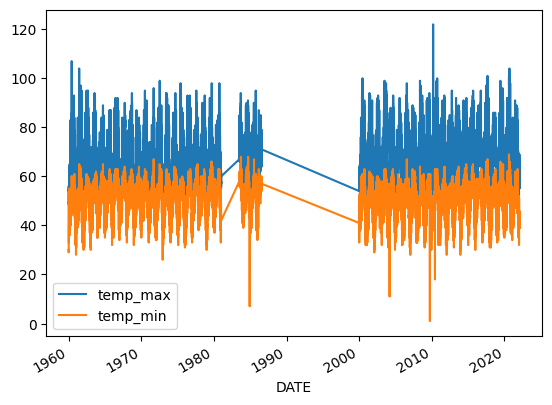

In [35]:
#Create a line plot for 'temp_max' and 'temp_min'
df1[['temp_max','temp_min']].plot()

Pada grafik tersebut terdapat beberapa gaps, adanya missing data sekitar tahun 1983 hingga 1985 dan 1990 hingga 1999. Hal ini mungkin terjadi karena perubahan pada stasiun cuaca di bandara tersebut.

In [36]:
#Cheking which years of data are missing
df1.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

Terdapat tahun yang hilang pada data tersebut yaitu 1981 hingga 1982 dan 1987 hingga 1999.

<Axes: xlabel='DATE'>

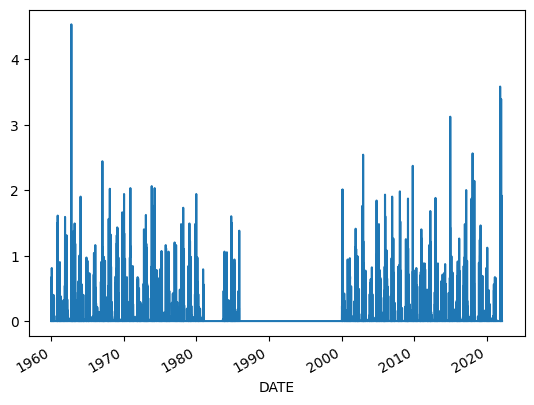

In [37]:
#Plot out the precipitation column
df1['precipitation'].plot()

<Axes: xlabel='DATE'>

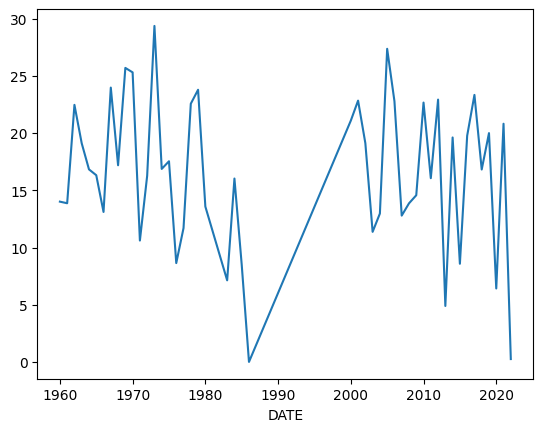

In [38]:
df1.groupby(df1.index.year).apply(lambda x: x["precipitation"].sum()).plot()

In [39]:
df1.groupby(df1.index.year).sum()

,precipitation,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


#**3. Data Pre-Processing**#

##3.1 Penambahan fitur baru bernama 'target'

Membangun modul prediksi yang dapat memprediksi nilai suhu maksimum pada waktu berikutnya. Hal ini dilakukan untuk mengevaluasi sejauh mana fitur-fitur lain dapat memberikan informasi untuk memprediksi target.

In [40]:
df1['target'] = df1.shift(-1)['temp_max']

Pendekatan ini dilakukan untuk memahami nilai saat ini berkaitan dengan nilai di masa depan.

In [41]:
df1

,precipitation,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


Terdapat nilai yang hilang (missing value) di akhir data karena semua nilai di setiap kolom digeser ke atas satu baris. Sehingga baris terakhir akan menyebabkan null values. Sehingga, dilakukan penghapusan baris pada tanggal terakhir tersebut.

In [42]:
#Cutoff the last row
df1 = df1.iloc[:-1,:].copy()

In [43]:
df1

,precipitation,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [44]:
#Use rig regression which is a type of regression that minimizes overfitting
reg = Ridge(alpha=.1)

Parameter alpha (α) digunakan dalam teknik regulasi untuk membantu mencegah overfitting dalam memberikan hukuman atau penalizing terhadap nilai absolut dari koefisien model regresi.

##3.2 Membuat ketiga kolom lainnya menjadi variabel predictors

In [45]:
predictors = ['precipitation', 'temp_max', 'temp_min']

##3.3 Membagi dataset menjadi train dan test sets##

In [46]:
#Create new DataFrame 'train' from the beginning up to December 31, 2020.
train = df1.loc[:'2020-12-31']

In [47]:
train

,precipitation,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [48]:
#Create new DataFrame 'test' from the January 1, 2021 to the end of the DataFrame.
test = df1.loc['2021-01-01':]

In [49]:
test

,precipitation,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [50]:
total_rows = len(df1)
train_rows = len(train)
test_rows = len (test)

#Persentase Train dan Test
train_percentage = (train_rows/total_rows) *100
test_percentage = (test_rows/total_rows) *100

print(f"Persentase Train: {train_percentage:.2f}%")
print(f"Persentase Test: {test_percentage:.2f}%")
print(total_rows)

Persentase Train: 97.68%
Persentase Test: 2.32%
16858


#**4. Data Modelling**#

In [51]:
#Used to train (fit) a regression model using the training data.
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [52]:
predictions = reg.predict(test[predictors])

In [53]:
#Calculate the mean absolute error (MAE) between the actual target values (test['target']) and the predicted values (predictions).
mean_absolute_error(test['target'],predictions)

3.4111699434528306

Nilai Mean Absolute Error (MAE) sebesar 3.403381607712503 mengindikasikan rata-rata perbedaan mutlak antara nilai aktual dan nilai prediksi. Dalam konteks ini, nilai MAE yang lebih rendah biasanya diinginkan, karena menunjukkan bahwa prediksi model, secara rata-rata, cukup dekat dengan nilai aktual.

#**5. Model Evaluation**#

In [54]:
df2 = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
df2.columns = ['actual', 'predictions']

In [55]:
df2

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

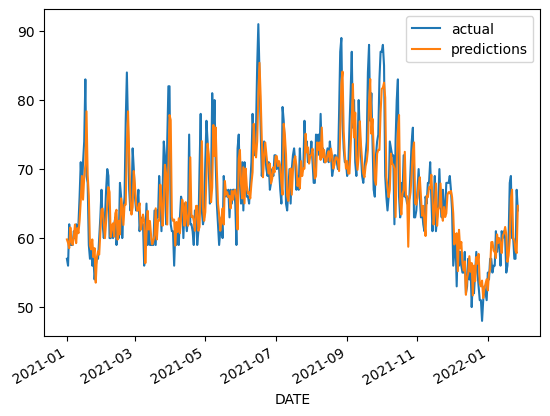

In [56]:
df2.plot()

In [57]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

##5.1 Create a function to make predictions

In [58]:
def create_predictions(predictors, df1, reg):
  train = df1.loc[:'2020-12-31']
  test = df1.loc['2021-01-01':]
  reg.fit(train[predictors], train['target'])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test['target'], predictions)
  df2 = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
  df2.columns = ['actual', 'predictions']
  return error, df2

##5.2 Create a rolling average

Berapa nilai suhu rata-rata suhu maksimum bulan ini dengan mempertimbangkan suhu bulan sebelumnya?

In [59]:
df1['month_max'] = df1['temp_max'].rolling(30).mean()

Nilai di setiap baris 'month_max' adalah rata-rata suhu maksimum harian dalam jendela waktu 30 hari yang berakhir pada tanggal tertentu.

In [60]:
df1

,precipitation,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [61]:
#Find some interesting ratios
df1['month_day_max'] = df1['month_max']/df1['temp_max']

In [62]:
#Ratio between the maximum temperature and the minimum temperature
df1['max_min'] = df1['temp_max']/df1['temp_min']

In [63]:
predictors = ['precipitation', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [64]:
df1 = df1.iloc[30:,:].copy()

In [65]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [66]:
error, df2 = create_predictions (predictors, df1, reg)

In [67]:
error

3.360129746207605

Sebelumnya, MAE adalah 3.4, dan setelah dilakukan beberapa penambahan fitur atau perubahan lainnya pada model, MAE berubah menjadi 3.36.

MAE sekitar 3.36 derajat Fahrenheit, yang berarti rata-rata kesalahan prediksi suhu maksimum harian adalah sekitar 3.36 derajat Fahrenheit.

<Axes: xlabel='DATE'>

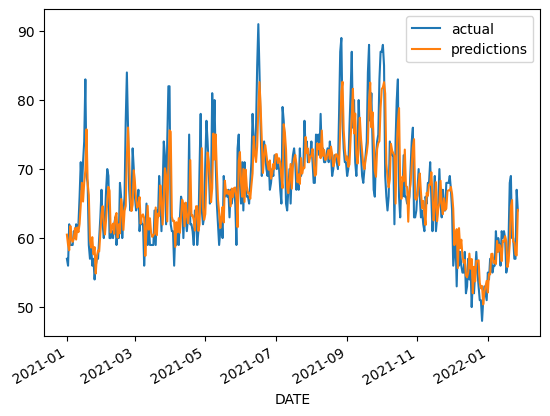

In [68]:
df2.plot()

##5.3 Adding in monthly and daily averages##

In [69]:
# Add more predictors - Monthly Average for 'temp_max'
df1["monthly_avg"] = df1.groupby(df1.index.month, group_keys=False)['temp_max'].apply(lambda x: x.expanding(1).mean())

In [70]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [71]:
df1['day_of_year_avg'] = df1['temp_max'].groupby(df1.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

Menggelompokkan data suhu maksimum berdasarkan hari dalam setahun.

In [72]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826


In [73]:
predictors = ['precipitation', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [74]:
error, df2 = create_predictions(predictors, df1, reg)

In [75]:
error

3.3176926587659956

Perbedaan antara nilai yang diprediksi oleh model dan nilai aktual yang diamati telah sedikit berkurang. Error telah sedikit berkurang dari 3.36 menjadi 3.31, ini berarti model regresi yang digunakan untuk memprediksi suhu maksimum besok cenderung lebih dekat atau akurat daripada sebelumnya.

##5.4 Running model diagnostics

In [76]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [77]:
df1.corr()['target']

precipitation     -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: target, dtype: float64

In [78]:
df2['diff'] = (df2['actual'] - df2['predictions']).abs()

In [79]:
df2.sort_values('diff', ascending=False).head()

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
2021-02-22,84.0,71.168844,12.831156
2021-10-16,66.0,78.823197,12.823197


## 5.5 Predict weather for the whole next week

In [80]:
df1['target_week'] = df1['temp_max'].shift(-7)

In [81]:
df1.isna().sum()

precipitation      0
temp_max           0
temp_min           0
target             0
month_max          0
month_day_max      0
max_min            0
monthly_avg        0
day_of_year_avg    0
target_week        7
dtype: int64

In [82]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week
DATE,,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000,62.0
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000,60.0
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000,55.0
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000,60.0
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000,61.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435,NaN
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130,NaN
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826,NaN


In [83]:
#Cutoff the last row
df1 = df1.iloc[:-7,:].copy()

In [84]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week
DATE,,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000,62.0
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000,60.0
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000,55.0
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000,60.0
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000,61.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-16,0.00,61.0,46.0,60.0,55.266667,0.906011,1.326087,56.759915,57.543478,60.0
2022-01-17,0.00,60.0,44.0,55.0,55.466667,0.924444,1.363636,56.762208,57.413043,60.0
2022-01-18,0.00,55.0,42.0,56.0,55.433333,1.007879,1.309524,56.760962,57.695652,57.0


In [85]:
#Use rig regression which is a type of regression that minimizes overfitting
reg = Ridge(alpha=.1)

In [86]:
predictors = ['precipitation', 'temp_max', 'temp_min']

In [87]:
#Create new DataFrame 'train' from the beginning up to December 31, 2020.
train = df1.loc[:'2020-12-31']

In [88]:
train

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week
DATE,,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000,62.0
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000,60.0
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000,55.0
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000,60.0
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000,61.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0,63.600000,1.009524,1.431818,56.694464,55.511111,56.0
2020-12-28,0.10,61.0,42.0,60.0,63.500000,1.040984,1.452381,56.697557,55.933333,62.0
2020-12-29,0.00,60.0,39.0,56.0,63.366667,1.056111,1.538462,56.699928,55.444444,59.0


In [89]:
#Create new DataFrame 'test' from the January 1, 2021 to the end of the DataFrame.
test = df1.loc['2021-01-01':]

In [90]:
test

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week
DATE,,,,,,,,,,
2021-01-01,0.00,60.0,40.0,57.0,62.833333,1.047222,1.500000,56.636896,55.355556,61.0
2021-01-02,0.14,57.0,51.0,56.0,62.533333,1.097076,1.117647,56.637162,54.644444,60.0
2021-01-03,0.00,56.0,49.0,62.0,62.200000,1.110714,1.142857,56.636696,55.000000,62.0
2021-01-04,0.36,62.0,46.0,59.0,62.133333,1.002151,1.347826,56.640614,55.644444,61.0
2021-01-05,0.00,59.0,42.0,59.0,61.966667,1.050282,1.404762,56.642336,55.533333,62.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-16,0.00,61.0,46.0,60.0,55.266667,0.906011,1.326087,56.759915,57.543478,60.0
2022-01-17,0.00,60.0,44.0,55.0,55.466667,0.924444,1.363636,56.762208,57.413043,60.0
2022-01-18,0.00,55.0,42.0,56.0,55.433333,1.007879,1.309524,56.760962,57.695652,57.0


In [91]:
#Used to train (fit) a regression model using the training data.
reg.fit(train[predictors], train['target_week'])

Ridge(alpha=0.1)

In [92]:
predictions = reg.predict(test[predictors])

In [93]:
#Calculate the mean absolute error (MAE) between the actual target values (test['target_week']) and the predicted values (predictions).
mean_absolute_error(test['target_week'],predictions)

4.578668837590555

In [94]:
df3 = pd.concat([test['target_week'], pd.Series(predictions, index=test.index)], axis=1)
df3.columns = ['actual', 'predictions']

In [95]:
df3

,actual,predictions
DATE,,
2021-01-01,61.0,59.210357
2021-01-02,60.0,63.157559
2021-01-03,62.0,62.488941
2021-01-04,61.0,61.189292
2021-01-05,62.0,59.908239
...,...,...
2022-01-16,60.0,62.408921
2022-01-17,60.0,61.158580
2022-01-18,57.0,58.803322


<Axes: xlabel='DATE'>

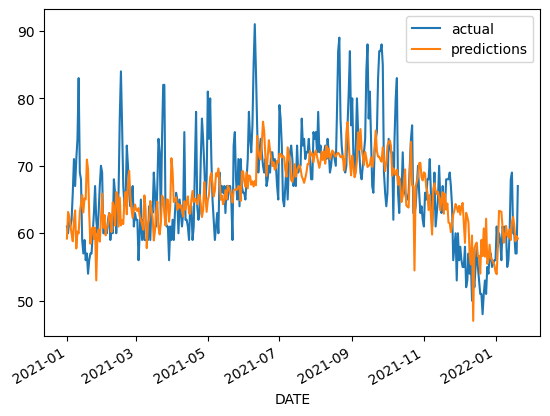

In [96]:
df3.plot()

In [97]:
reg.coef_

array([-4.1551597 ,  0.27622925,  0.48705565])

In [98]:
def create_weekly_predictions(predictors, df1, reg):
    train = df1.loc[:'2020-12-31']
    test = df1.loc['2021-01-01':]
    reg.fit(train[predictors], train['target_week'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target_week'], predictions)
    df3 = pd.concat([test['target_week'], pd.Series(predictions, index=test.index)], axis=1)
    df3.columns = ['actual_week', 'predictions_week']
    return error, df3


In [99]:
df1['week_max'] = df1['temp_max'].rolling(7).mean()

In [100]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week,week_max
DATE,,,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000,62.0,NaN
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000,60.0,NaN
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000,55.0,NaN
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000,60.0,NaN
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16,0.00,61.0,46.0,60.0,55.266667,0.906011,1.326087,56.759915,57.543478,60.0,59.285714
2022-01-17,0.00,60.0,44.0,55.0,55.466667,0.924444,1.363636,56.762208,57.413043,60.0,59.571429
2022-01-18,0.00,55.0,42.0,56.0,55.433333,1.007879,1.309524,56.760962,57.695652,57.0,58.857143


In [101]:
#Find some interesting ratios
df1['week_day_max'] = df1['week_max']/df1['temp_max']

In [102]:
#Ratio between the maximum temperature and the minimum temperature
df1['week_max_min'] = df1['temp_max']/df1['temp_min']

In [103]:
predictors = ['precipitation', 'temp_max', 'temp_min', 'week_max', 'week_day_max', 'week_max_min']

In [104]:
df1 = df1.iloc[7:,:].copy()

In [105]:
error, df3 = create_predictions (predictors, df1, reg)

In [106]:
error

3.4095425763125022

<Axes: xlabel='DATE'>

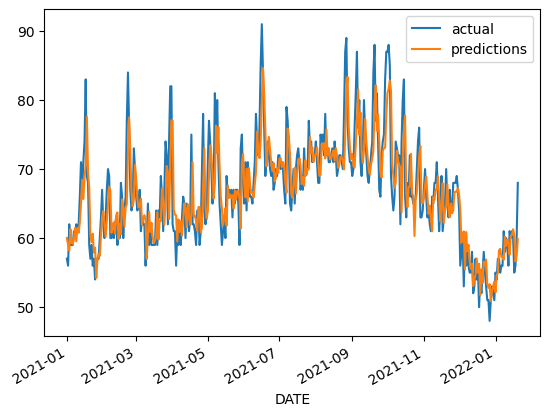

In [107]:
df3.plot()

In [108]:
# Add more predictors - Weekly Average for 'temp_max'
df1["week_avg"] = df1.groupby(df1.index.month, group_keys=False)['temp_max'].apply(lambda x: x.expanding(1).mean())

In [109]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week,week_max,week_day_max,week_max_min,week_avg
DATE,,,,,,,,,,,,,,
1960-02-07,0.06,62.0,55.0,60.0,57.233333,0.923118,1.127273,60.714286,62.000000,62.0,60.714286,0.979263,1.127273,62.000000
1960-02-08,0.51,60.0,50.0,55.0,57.533333,0.958889,1.200000,60.625000,60.000000,61.0,60.428571,1.007143,1.200000,61.000000
1960-02-09,0.36,55.0,48.0,60.0,57.533333,1.046061,1.145833,60.000000,55.000000,64.0,59.857143,1.088312,1.145833,59.000000
1960-02-10,0.07,60.0,44.0,61.0,57.766667,0.962778,1.363636,60.000000,60.000000,62.0,60.000000,1.000000,1.363636,59.250000
1960-02-11,0.00,61.0,40.0,61.0,58.033333,0.951366,1.525000,60.090909,61.000000,55.0,60.142857,0.985948,1.525000,59.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16,0.00,61.0,46.0,60.0,55.266667,0.906011,1.326087,56.759915,57.543478,60.0,59.285714,0.971897,1.326087,56.758327
2022-01-17,0.00,60.0,44.0,55.0,55.466667,0.924444,1.363636,56.762208,57.413043,60.0,59.571429,0.992857,1.363636,56.760623
2022-01-18,0.00,55.0,42.0,56.0,55.433333,1.007879,1.309524,56.760962,57.695652,57.0,58.857143,1.070130,1.309524,56.759377


In [110]:
df1['day_of_year1_avg'] = df1['temp_max'].groupby(df1.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [111]:
df1

,precipitation,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,target_week,week_max,week_day_max,week_max_min,week_avg,day_of_year1_avg
DATE,,,,,,,,,,,,,,,
1960-02-07,0.06,62.0,55.0,60.0,57.233333,0.923118,1.127273,60.714286,62.000000,62.0,60.714286,0.979263,1.127273,62.000000,62.000000
1960-02-08,0.51,60.0,50.0,55.0,57.533333,0.958889,1.200000,60.625000,60.000000,61.0,60.428571,1.007143,1.200000,61.000000,60.000000
1960-02-09,0.36,55.0,48.0,60.0,57.533333,1.046061,1.145833,60.000000,55.000000,64.0,59.857143,1.088312,1.145833,59.000000,55.000000
1960-02-10,0.07,60.0,44.0,61.0,57.766667,0.962778,1.363636,60.000000,60.000000,62.0,60.000000,1.000000,1.363636,59.250000,60.000000
1960-02-11,0.00,61.0,40.0,61.0,58.033333,0.951366,1.525000,60.090909,61.000000,55.0,60.142857,0.985948,1.525000,59.600000,61.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16,0.00,61.0,46.0,60.0,55.266667,0.906011,1.326087,56.759915,57.543478,60.0,59.285714,0.971897,1.326087,56.758327,57.543478
2022-01-17,0.00,60.0,44.0,55.0,55.466667,0.924444,1.363636,56.762208,57.413043,60.0,59.571429,0.992857,1.363636,56.760623,57.413043
2022-01-18,0.00,55.0,42.0,56.0,55.433333,1.007879,1.309524,56.760962,57.695652,57.0,58.857143,1.070130,1.309524,56.759377,57.695652


In [112]:
predictors = ['precipitation', 'temp_max', 'temp_min', 'week_max', 'week_day_max', 'week_max_min', 'day_of_year1_avg']

In [113]:
error, df3 = create_predictions(predictors, df1, reg)

In [114]:
error

3.3057946845345314

In [115]:
reg.coef_

array([-1.13320374,  0.51106345,  0.05555402,  0.16363495, -7.33886867,
        0.07523132,  0.23933342])

In [116]:
df1.corr()['target_week']

precipitation      -0.157508
temp_max            0.540127
temp_min            0.565775
target              0.543002
month_max           0.629014
month_day_max      -0.100895
max_min            -0.004257
monthly_avg         0.677243
day_of_year_avg     0.663093
target_week         1.000000
week_max            0.622067
week_day_max       -0.018579
week_max_min       -0.004257
week_avg            0.677234
day_of_year1_avg    0.663046
Name: target_week, dtype: float64

In [117]:
df3['diff'] = (df3['actual'] - df3['predictions']).abs()

In [118]:
df3.sort_values('diff', ascending=False).head()

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.813351,14.186649
2021-04-01,62.0,75.631245,13.631245
2021-05-07,81.0,68.036892,12.963108
2021-02-21,77.0,64.549758,12.450242
2021-02-22,84.0,71.602975,12.397025
